<a href="https://colab.research.google.com/github/Arroxkun/G11_Intro2CS_Project/blob/task2/PROJECT_Brain_Tumor_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Prepare/collect data

In [10]:
import os

path = os.listdir('/content/drive/MyDrive/brain-tumor-detection-master/brain_tumor/Training')
classes = {'no_tumor': 0, 'pituitary_tumor': 1}

In [12]:
import cv2
X = []
Y = []

# Make sure 'classes' is defined as you showed before
classes = {'no_tumor': 0, 'pituitary_tumor': 1}

for cls in classes:
    pth = '/content/drive/MyDrive/brain-tumor-detection-master/brain_tumor/Training/' + cls  # Add a forward slash
    for j in os.listdir(pth):
        img = cv2.imread(os.path.join(pth, j), 0)  # Use os.path.join to join the path components
        img = cv2.resize(img, (200, 200))
        X.append(img)
        Y.append(classes[cls])

In [13]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [14]:
np.unique(Y)

array([0, 1])

In [15]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

In [16]:
X.shape, X_updated.shape

((1222, 200, 200), (1222, 40000))

### Visualize data

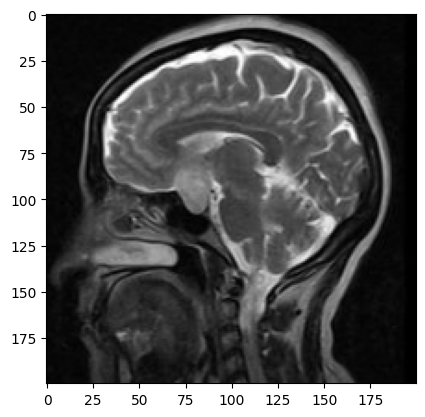

In [17]:
plt.imshow(X[0], cmap='gray')

### Prepare data

In [18]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

### Split Data

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [ ]:
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

### Feature Scaling

In [20]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


### Feature Selection: PCA

In [21]:
from sklearn.decomposition import PCA

In [ ]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(977, 40000) (245, 40000)


In [22]:
# print(pca_train.shape, pca_test.shape)
# print(pca.n_components_)
# print(pca.n_features_)

### Train Model

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [24]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)


LogisticRegression(C=0.1)

In [25]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

### Evaluation

In [26]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.963265306122449


In [27]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9918116683725691
Testing Score: 0.9755102040816327


### Prediction

In [28]:
pred = sv.predict(xtest)


In [29]:
misclassified=np.where(ytest!=pred)
misclassified

(array([ 41,  52,  57,  75, 113, 204]),)

In [30]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples:  6
1 1


### TEST MODEL

In [31]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

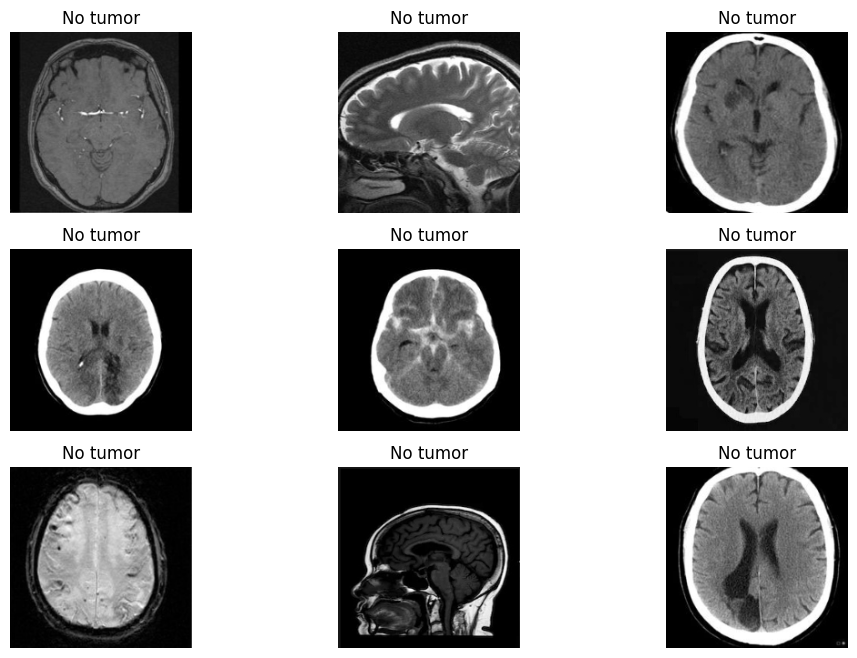

In [42]:
plt.figure(figsize=(12, 8))
c = 1

# Update the path to the 'Testing' directory and class-specific subdirectory
testing_path = '/content/drive/MyDrive/brain-tumor-detection-master/brain_tumor/Testing/no_tumor'

for i in os.listdir('/content/drive/MyDrive/brain-tumor-detection-master/brain_tumor/Testing/no_tumor')[:9]:
    plt.subplot(3, 3, c)

    img = cv2.imread(os.path.join(testing_path, i), 0)
    img = cv2.resize(img, (200, 200))
    img = img / 255.0  # Normalize the image between 0 and 1
    # Assuming 'sv' is your model for prediction. Make sure it's defined and loaded.
    # p = sv.predict(img)  # Comment out this line for now to avoid prediction errors
    plt.title('No tumor')  # You can change this to show the predicted class
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c += 1

plt.show()


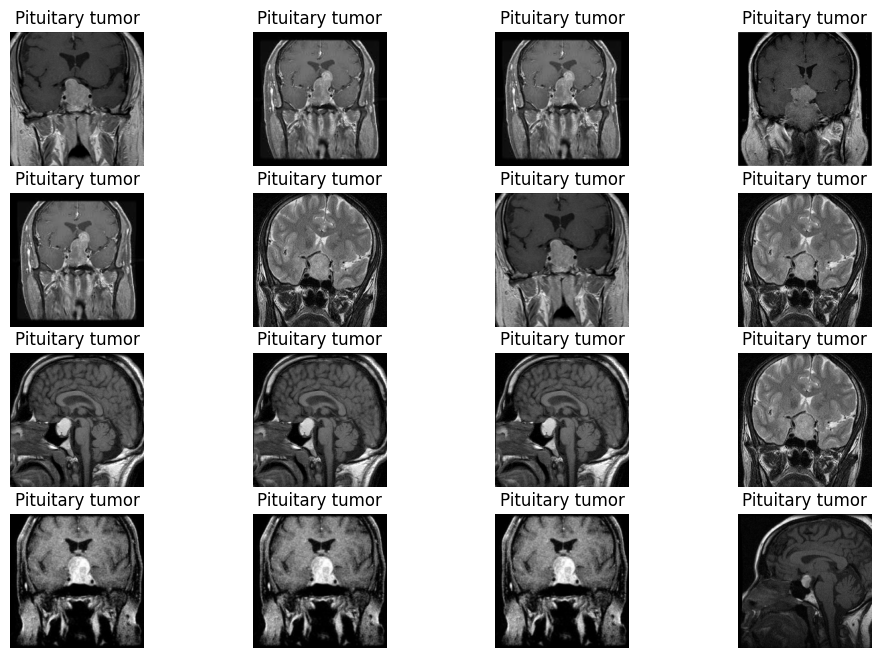

In [43]:
plt.figure(figsize=(12, 8))
c = 1

# Update the path to the 'Testing' directory and class-specific subdirectory
testing_path = '/content/drive/MyDrive/brain-tumor-detection-master/brain_tumor/Testing/pituitary_tumor'

for i in os.listdir('/content/drive/MyDrive/brain-tumor-detection-master/brain_tumor/Testing/pituitary_tumor')[:16]:
    plt.subplot(4, 4, c)

    img = cv2.imread(os.path.join('/content/drive/MyDrive/brain-tumor-detection-master/brain_tumor/Testing/pituitary_tumor', i), 0)
    img = cv2.resize(img, (200, 200))
    img = img / 255.0  # Normalize the image between 0 and 1
    # Assuming 'sv' is your model for prediction. Make sure it's defined and loaded.
    # p = sv.predict(img)  # Comment out this line for now to avoid prediction errors
    plt.title('Pituitary tumor')  # You can change this to show the predicted class
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c += 1

plt.show()
